In [362]:
# Plot a bi-variate distribution manually

In [363]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [364]:
# density of multivariate distribution
# works for n dimension
def get_multivariate_distribution(mu, cov_matrix):
    """mu is a vector of mean (dx1) matrix and cov_matrix is a dxd matrix that is invertible"""
    d = np.shape(cov_matrix)[0]
    det_cov_matrix = np.linalg.det(cov_matrix)
    def density(x):
        """x is a dx1 dimensional input"""
        inv_coefficient = (np.power((2.0 * np.pi), (d / 2.0))) * (np.sqrt(det_cov_matrix))
        coefficient = 1.0 / inv_coefficient
        x_minus_mu = x - mu
        x_minus_mu_transpose = np.transpose(x_minus_mu)
        cov_matrix_inverse = np.linalg.inv(cov_matrix)
        power = -0.5 * (np.matmul(x_minus_mu_transpose, np.matmul(cov_matrix_inverse, x_minus_mu))).item(0)
        return coefficient * np.exp(power)
    return density

In [365]:
def make_vector(X, Y):
    n = np.shape(X)[0]
    vectors = np.ndarray(shape=(n, n, 2, 1))
    for i in range(n):
        for j in range(n):
            x_comp = X[i][j]
            y_comp = Y[i][j]
            vectors[i][j] = np.array([[x_comp], [y_comp]])
    return vectors

In [366]:
X = np.arange(-3, 3.1, 0.1)
Y = np.flip(X)
X, Y = np.meshgrid(X, Y)
xy = make_vector(X, Y)

In [367]:
mu = np.array([[0], [0]])
cov_matrix = np.eye(2)
# cov_matrix = np.array([[1, 0.5], [0.5, 1]])
# cov_matrix = np.array([[1, 0], [0, 1]])
f = get_multivariate_distribution(mu, cov_matrix)

In [368]:
def apply_f(xy, f):
    m = np.shape(xy)[0]
    n = np.shape(xy)[1]
    result = np.zeros(shape=(m, n))
    for i in range(m):
        for j in range(n):
            result[i][j] = f(xy[i][j])
    return result

In [369]:
z = apply_f(xy, f)

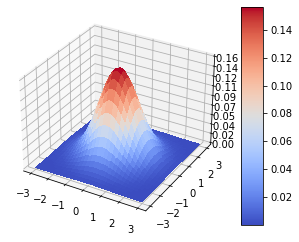

In [377]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.

# Plot the surface.
surf = ax.plot_surface(X, Y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}    ')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=1, aspect=10)

plt.show()